# Question 1

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [11]:
#Loading dataset 
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [14]:
df = df.drop(columns='CUST_ID', axis=1)   #Dropping the Cust_ID columns

In [15]:
df.isnull().sum()  #find all missing values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
print(df["CREDIT_LIMIT"].value_counts())

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


In [20]:
# replace missings values CREDIT_LIMIT with the frequent value 3000.000000

df["CREDIT_LIMIT"].fillna('3000.000000', inplace=True)  

In [23]:
#replace missing MINIMUM_PAYMENTS values with median

df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [25]:
df.isnull().sum().sum()

0

In [27]:
X = df.iloc[:, [2,11]]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

# Question 2

In [29]:
#hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=hc.fit_predict(X_sc)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


# Question 3

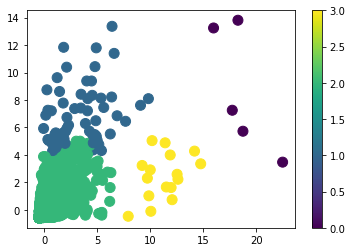

In [30]:
fig=plt.scatter(X_sc[:,0],X_sc[:,1], c=clust_labels, s=100)
plt.colorbar()


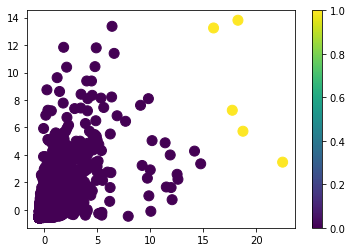

In [46]:
hc_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels_2=hc_2.fit_predict(X_sc)  #Applying agglomerative algorithm with 2 clusters, using euclidean distance as a metric
fig=plt.scatter(X_sc[:,0],X_sc[:,1], c=clust_labels_2, s=100)
plt.colorbar()

# Question 4

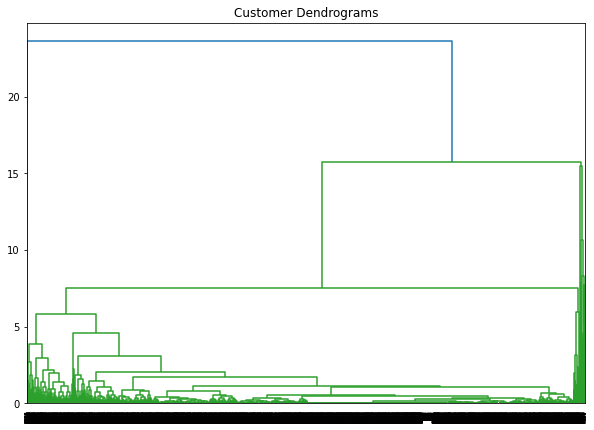

In [35]:
# Plot the dendrogram

#permet d'afficher le graphe sur jupiter ou une fenetre à part sous forme de png en utisant qt
#%matplotlib inline

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(X_sc, method="complete"))

In [47]:
distance=[]
K = range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(X_sc)
    distance.append(km.inertia_)


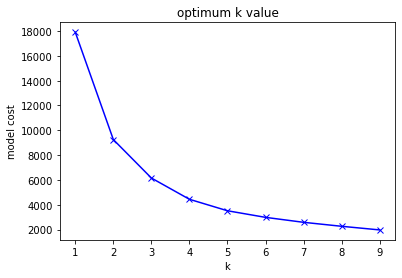

In [48]:
plt.plot(K,distance, 'bx-')
plt.xlabel('k')
plt.ylabel('model cost')
plt.title('optimum k value')
plt.show()

# Question 5

In [36]:
#Try different k values and select the best one

kmeans=KMeans(n_clusters=4, random_state=0)  
kmeans.fit(X_sc)

KMeans(n_clusters=4, random_state=0)

In [37]:
labels=pd.DataFrame(kmeans.labels_)

In [38]:
kmeans.predict(X_sc)
print(kmeans.cluster_centers_)

[[12.91729642  4.49746526]
 [-0.28400903 -0.33472526]
 [ 0.78749264  0.96640141]
 [ 2.8113927   4.09445849]]


# Question 6

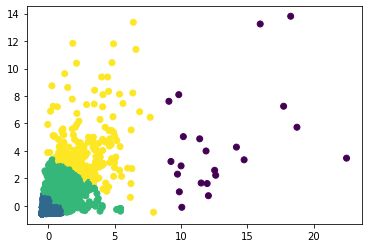

In [40]:
#Plot the clusters

plt.scatter(X_sc[:,0], X_sc[:,1], c=kmeans.predict(X_sc))

[[-0.17679099 -0.19880846]
 [ 2.41286424  2.71336125]]


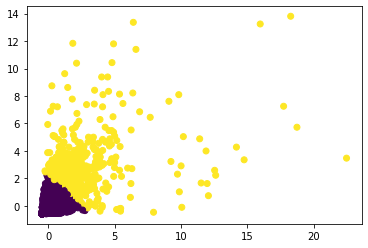

In [41]:
#Cluster our data by choosing 2 as number of clusters
kmeans_2=KMeans(n_clusters=2, random_state=0)  
kmeans_2.fit(X_sc)
kmeans_2.predict(X_sc)
print(kmeans_2.cluster_centers_)
plt.scatter(X_sc[:,0], X_sc[:,1], c=kmeans_2.predict(X_sc))

[[ 1.12985509  1.4878455 ]
 [-0.2485393  -0.29067503]
 [ 6.2324606   5.33082818]]


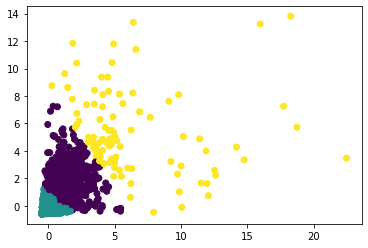

In [42]:
#Cluster our data by choosing 3 as number of clusters
kmeans_3=KMeans(n_clusters=3, random_state=0)  
kmeans_3.fit(X_sc)
kmeans_3.predict(X_sc)
print(kmeans_3.cluster_centers_)
plt.scatter(X_sc[:,0], X_sc[:,1], c=kmeans_3.predict(X_sc))

[[12.91729642  4.49746526]
 [-0.32044598 -0.38290113]
 [ 0.44223665  0.59222987]
 [ 3.52738354  6.84683523]
 [ 2.01635153  2.35558512]]


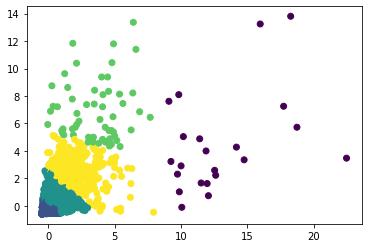

In [43]:
#Cluster our data by choosing 5 as number of clusters
kmeans_5=KMeans(n_clusters=5, random_state=0)  
kmeans_5.fit(X_sc)
kmeans_5.predict(X_sc)
print(kmeans_5.cluster_centers_)
plt.scatter(X_sc[:,0], X_sc[:,1], c=kmeans_5.predict(X_sc))

[[ 0.06622716  0.12573905]
 [ 3.88466841  2.31548582]
 [-0.37698053 -0.45355004]
 [ 0.89024087  1.02011031]
 [12.91729642  4.49746526]
 [ 1.44457363  3.04592624]
 [ 3.77018467  7.97970894]]


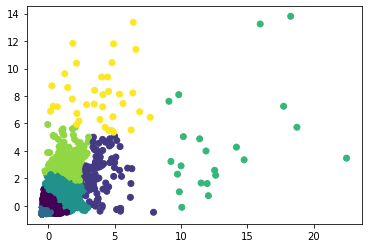

In [44]:
#Cluster our data by choosing 7 as number of clusters
kmeans_7=KMeans(n_clusters=7, random_state=0) 
kmeans_7.fit(X_sc)
kmeans_7.predict(X_sc)
print(kmeans_7.cluster_centers_)
plt.scatter(X_sc[:,0], X_sc[:,1], c=kmeans_7.predict(X_sc))

# Question 7



According to the results obtained between the 2 methods namely Hierarchical Clustering and K-means we can conclude that the best number of cluster is 2 . This is affirmed by the scores obtained following the comparison of the different n_clusters chosen for each method. For n_cluster = 2 the score obtained is the highest. On the other hand we see that the score for Hierarchical Clustering is higher than the one obtained with K-means. Therefore we can deduce that Hierarchical Clustering does a better clustering than K-means for this study. So the analysis will be easier with the Hierarchical than the K-means


# Question 8

#Another validation metric : Silhouette Coefficient

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters



In [49]:
#Cluster our data by choosing 4 as number of clusters
silhouette_avg = silhouette_score(X_sc, kmeans.predict(X_sc))
print(
        "The average silhouette_score is :",
        silhouette_avg,
    )

The average silhouette_score is : 0.6670865246560408


In [50]:
#Cluster our data by choosing 2 as number of clusters
silhouette_avg = silhouette_score(X_sc, kmeans_2.predict(X_sc))
print(
        "The average silhouette_score is :",
        silhouette_avg,
    )


The average silhouette_score is : 0.7895501283324563


In [51]:
#Cluster our data by choosing 3 as number of clusters
silhouette_avg = silhouette_score(X_sc, kmeans_3.predict(X_sc))
print(
        "The average silhouette_score is :",
        silhouette_avg,
    )

The average silhouette_score is : 0.7098428176817974


In [52]:
#Cluster our data by choosing 5 as number of clusters
silhouette_avg = silhouette_score(X_sc, kmeans_5.predict(X_sc))
print(
        "The average silhouette_score is :",
        silhouette_avg,
    )

The average silhouette_score is : 0.6198048417065201


In [53]:
#Cluster our data by choosing 7 as number of clusters
silhouette_avg = silhouette_score(X_sc, kmeans_7.predict(X_sc))
print(
        "The average silhouette_score is :",
        silhouette_avg,
    )

The average silhouette_score is : 0.5295609183944329
